In [66]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import tables

In [67]:
%matplotlib inline

In [68]:
gfile = '/proj/sot/ska/data/gui_stats/guide_stats.h5'
h5 = tables.openFile(gfile)
data = h5.root.data[:]
h5.close()
data = Table(data)

In [69]:
ok = data['guide_datestart'] > '2012'

In [70]:
data[0:1]

obsid,obi,guide_datestart,guide_tstart,kalman_datestop,revision,slot,idx,type,yang,zang,sz,mag,n_samples,not_tracking,within_0.3,within_1,within_3,within_5,within_0.3_ok,within_1_ok,within_3_ok,within_5_ok,within_0.3_modok,within_1_modok,within_3_modok,within_5_modok,outside_5,outside_5_ok,outside_5_modok,obc_bad_status,mod_obc_bad_status,common_col,quad_bound,sat_pix,def_pix,ion_rad,mult_star,aoacmag_min,aoacmag_mean,aoacmag_max,aoacmag_std,aoacyan_mean,aoaczan_mean,dy_min,dy_mean,dy_std,dy_max,dz_min,dz_mean,dz_std,dz_max,dr_min,dr_mean,dr_std,dr_5th,dr_95th,dr_max,n_trak_interv,agasc_id,color1,ra,dec,epoch,pm_ra,pm_dec,var,pos_err,mag_aca,mag_err,mag_band,pos_catid,aspq1,aspq2,aspq3,acqq1,acqq2,acqq4,n100_warm_frac,tccd_mean,tccd_max,known_bad,bad_comment
int64,int64,string168,float64,string168,string120,int64,int64,string40,float64,float64,string32,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,bool,string120
19717,0,2017:053:08:15:12.754,604138581.938,2017:053:15:14:13.443,0.1,3,4,BOT,-1783.0,-527.0,6x6,7.82,24653,121,10168,24462,24525,24525,10164,24407,24467,24467,10164,24407,24467,24467,7,5,5,60,60,0,0,0,4350,60,4,7.0,7.71105575562,8.1875,0.0387974791229,-1783.74249348,-527.366280776,0.00124915511856,0.224182916656,0.371563613943,-23.7153684779,0.00242394374266,0.19425418587,0.465154947973,29.9030876483,0.00272688316174,0.352031923888,0.56435346924,0.110820329112,0.612184659163,38.1656043178,1,136974776,-0.00679991254583,288.74210928,10.40940244,2000.0,-9999,-9999,-9999,6,7.81952142715,1,4,5,0,0,999,-9999,-9999,272,0.225964400544,-13.2516107559,-12.9857177734,False,


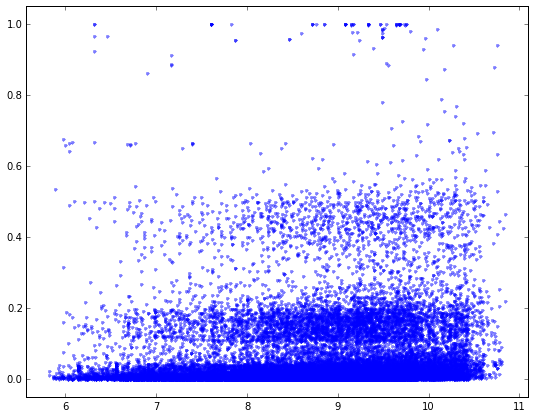

In [71]:
plt.figure(figsize=(9, 7))
plt.plot(data['mag'][ok], 1.0 * data['not_tracking'][ok] / data['n_samples'][ok], 'b.', alpha=.5)
plt.margins(0.05)

I don't see where even some randomization at 0 and 1 is going to help with visibility that much, so I heatmapped this too:

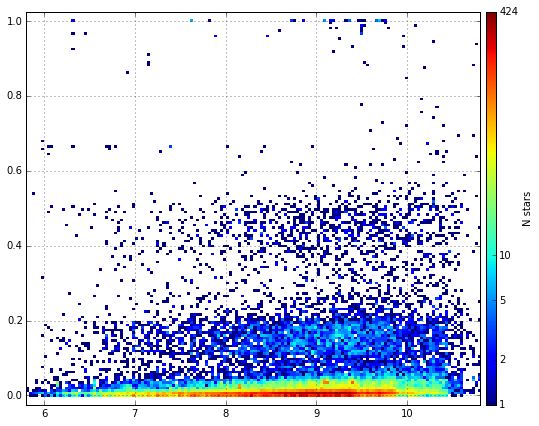

In [72]:
norm = mpl.colors.LogNorm()
fig = plt.figure(figsize=( 9, 7))
H, xedges, yedges = np.histogram2d(data['mag'][ok], 1.0 * data['not_tracking'][ok] / data['n_samples'][ok],
bins=150, range=[[5.8, 10.8], [-0.025, 1.025]])
ax1 = fig.add_axes([0.14, 0.14, 0.70, 0.78])
ax1.pcolorfast(xedges, yedges, H.T, cmap=cm.jet, norm=norm)
plt.grid()
ax2 = fig.add_axes([0.85, 0.14, 0.015, 0.78])
tick_locs = [norm.vmin, 2, 5, 10, norm.vmax]
cb = mpl.colorbar.ColorbarBase(ax2,
                                cmap=cm.jet,
                                norm=norm,
                                orientation='vertical')
cb.locator = mpl.ticker.FixedLocator(tick_locs)
cb.formatter = mpl.ticker.FormatStrFormatter("%d")
plt.ylabel("N stars")
cb.update_ticks()

In [73]:
bin_edge = np.arange(9.0, 10.8, .05)
fracs = []
mean_mag = []
std = []
for bl, br in zip(bin_edge[0:-1], bin_edge[1:]):
    mag_ok = (data['mag'][ok] >= bl) & (data['mag'][ok] < br)
    stars = data[ok][mag_ok]
    mean_mag.append(np.mean(stars['mag']))
    fracs.append(np.mean(1.0 * stars['not_tracking'] / stars['n_samples']))
    std.append(np.std(1.0 * stars['not_tracking'] / stars['n_samples']))
std = np.array(std)

In [74]:
yerr = np.vstack([std, std])

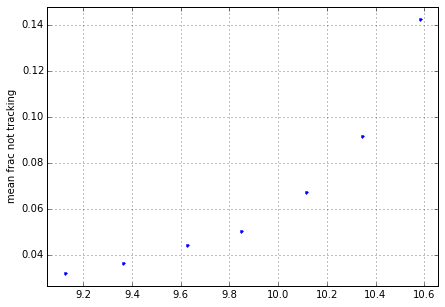

In [91]:
plt.figure(figsize=(7, 5))
plt.plot(mean_mag, fracs, 'b.')
plt.ylabel('mean frac not tracking')
plt.grid()
plt.margins(0.05)

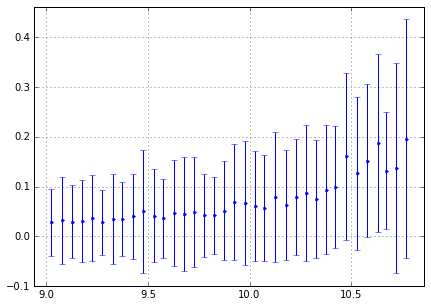

In [76]:
plt.figure(figsize=(7, 5))
plt.errorbar(mean_mag, fracs, yerr=yerr, linestyle='', marker=".")
plt.ylabel('mean frac not tracking')
plt.grid()
plt.margins(0.05)

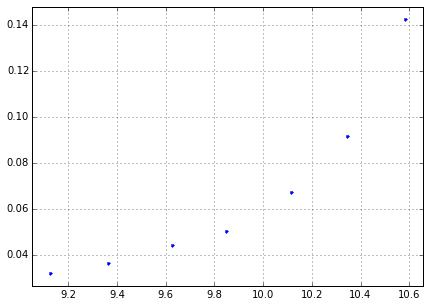

In [77]:
bin_edge = np.arange(9.0, 10.8, .25)
fracs = []
mean_mag = []
std = []
for bl, br in zip(bin_edge[0:-1], bin_edge[1:]):
    mag_ok = (data['mag'][ok] >= bl) & (data['mag'][ok] < br)
    stars = data[ok][mag_ok]
    mean_mag.append(np.mean(stars['mag']))
    fracs.append(np.mean(1.0 * stars['not_tracking'] / stars['n_samples']))
    std.append(np.std(1.0 * stars['not_tracking'] / stars['n_samples']))
std = np.array(std)
yerr = np.vstack([std, std])
plt.figure(figsize=(7, 5))
plt.plot(mean_mag, fracs, 'b.')
plt.ylabel('mean frac not tracking')
plt.grid()
plt.margins(0.05)

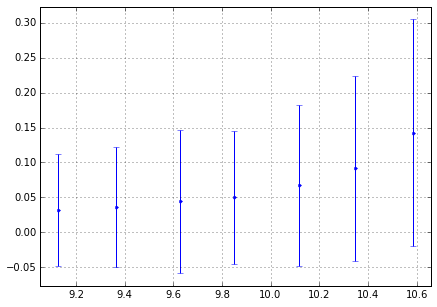

In [78]:
plt.figure(figsize=(7, 5))
plt.errorbar(mean_mag, fracs, yerr=yerr, linestyle='', marker='.')
plt.ylabel('mean frac not tracking')
plt.grid()
plt.margins(0.05)

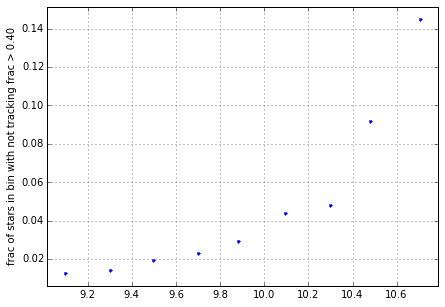

In [104]:
bin_edge = np.arange(9.0, 10.8, .2)
bad_frac = []
n = []
mean_mag = []
for bl, br in zip(bin_edge[0:-1], bin_edge[1:]):
    mag_ok = (data['mag'][ok] >= bl) & (data['mag'][ok] < br)
    stars = data[ok][mag_ok]
    mean_mag.append(np.mean(stars['mag']))
    n.append(len(stars))
    frac = 1.0 * stars['not_tracking'] / stars['n_samples']
    bad_frac.append(1.0 * np.count_nonzero(frac > .40) / len(stars))
#yerr = np.vstack([std, std])
plt.figure(figsize=(7, 5))
plt.plot(mean_mag, bad_frac, 'b.')
plt.ylabel("frac of stars in bin with not tracking frac > 0.40")
plt.grid()
plt.margins(0.05)

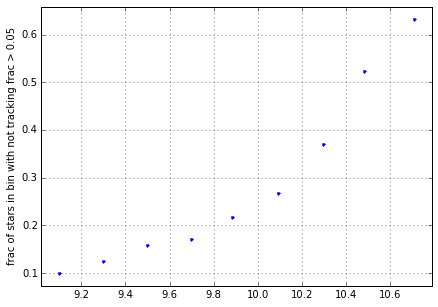

In [105]:
bin_edge = np.arange(9.0, 10.8, .2)
bad_frac = []
n = []
mean_mag = []
for bl, br in zip(bin_edge[0:-1], bin_edge[1:]):
    mag_ok = (data['mag'][ok] >= bl) & (data['mag'][ok] < br)
    stars = data[ok][mag_ok]
    mean_mag.append(np.mean(stars['mag']))
    n.append(len(stars))
    frac = 1.0 * stars['not_tracking'] / stars['n_samples']
    bad_frac.append(1.0 * np.count_nonzero(frac > .05) / len(stars))
#yerr = np.vstack([std, std])
plt.figure(figsize=(7, 5))
plt.plot(mean_mag, bad_frac, 'b.')
plt.ylabel("frac of stars in bin with not tracking frac > 0.05")
plt.grid()
plt.margins(0.05)